In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from textstat import syllable_count
from spellchecker import SpellChecker
import string

# Download NLTK resources (only needed once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

# Specify the path to your Excel file
file_path = r'data/restaurant_reviews-v2-1.xlsx'  # Replace with your file path

# Read the Excel file
df = pd.read_excel(file_path)

# Display the first few rows of the DataFrame
print(df.head())

[nltk_data] Downloading package punkt to /Users/ha5hkat/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ha5hkat/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/ha5hkat/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/ha5hkat/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/ha5hkat/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


                         Restaurant  \
0                       Tikka Shack   
1                       Tikka Shack   
2                       Tikka Shack   
3                       Tikka Shack   
4  India Palace\nIndian\nRestaurant   

                                              Review  Real=1/Fake=0  \
0  Great food and great atmosphere! The chicken t...              0   
1  I had heard good things about Tikka Shak so I ...              0   
2  I was driving by tikka shack one day and decid...              0   
3  Tikka Shack had the most modern and up-to-date...              0   
4  Today is the third time I've come to India Pal...              0   

   positive=1/negative=0  AWL  ASL  NOW  NVB  NAJ  NPV  NST  CDV  NTP  TPR  
0                      1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1                      0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2                      0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3                      1  NaN 

In [2]:
df.head()

,Restaurant,Review,Real=1/Fake=0,positive=1/negative=0,AWL,ASL,NOW,NVB,NAJ,NPV,NST,CDV,NTP,TPR
0,Tikka Shack,Great food and great atmosphere! The chicken t...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tikka Shack,I had heard good things about Tikka Shak so I ...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tikka Shack,I was driving by tikka shack one day and decid...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tikka Shack,Tikka Shack had the most modern and up-to-date...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,India Palace\nIndian\nRestaurant,Today is the third time I've come to India Pal...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Initialize spell checker
spell = SpellChecker()

# Function to calculate Average Word Length (AWL)
def average_word_length(text):
    words = [word for word in word_tokenize(text) if word.isalpha()]
    if len(words) == 0:
        return 0
    return sum(len(word) for word in words) / len(words)

# Function to calculate Average Sentence Length (ASL)
def average_sentence_length(text):
    sentences = sent_tokenize(text)
    if len(sentences) == 0:
        return 0
    return sum(len(word_tokenize(sentence)) for sentence in sentences) / len(sentences)

# Function to calculate Number of Words (NWO)
def number_of_words(text):
    return len([word for word in word_tokenize(text) if word.isalpha()])

# Function to calculate Number of Verbs (NVB)
def number_of_verbs(text):
    pos_tags = nltk.pos_tag(word_tokenize(text))
    return len([word for word, pos in pos_tags if pos.startswith('VB')])

# Function to calculate Number of Adjectives (NAJ)
def number_of_adjectives(text):
    pos_tags = nltk.pos_tag(word_tokenize(text))
    return len([word for word, pos in pos_tags if pos.startswith('JJ')])

# Function to calculate Number of Passive Voice (NPV)
def number_of_passive_voice(text):
    sentences = sent_tokenize(text)
    passive_count = 0
    for sentence in sentences:
        words = word_tokenize(sentence)
        pos_tags = nltk.pos_tag(words)
        for i in range(len(pos_tags) - 1):
            if pos_tags[i][1] == 'VBN' and pos_tags[i + 1][1] == 'VBD':
                passive_count += 1
    return passive_count

# Function to calculate Number of Sentences (NST)
def number_of_sentences(text):
    return len(sent_tokenize(text))

# Function to calculate Content Diversity (CDV)
def content_diversity(text):
    words = [word.lower() for word in word_tokenize(text) if word.isalpha() and word.lower() not in stopwords.words('english')]
    if len(words) == 0:
        return 0
    unique_words = set(words)
    return len(unique_words) / len(words)

# Function to calculate Number of Typos (NTP)
def number_of_typos(text):
    words = [word for word in word_tokenize(text) if word.isalpha()]
    misspelled = spell.unknown(words)
    return len(misspelled)

# Function to calculate Typo Ratio (TPR)
def typo_ratio(text):
    words = [word for word in word_tokenize(text) if word.isalpha()]
    if len(words) == 0:
        return 0
    misspelled = spell.unknown(words)
    return len(misspelled) / len(words)

In [4]:
# Apply the functions to the Review column
df['AWL'] = df['Review'].apply(average_word_length)
df['ASL'] = df['Review'].apply(average_sentence_length)
df['NWO'] = df['Review'].apply(number_of_words)
df['NVB'] = df['Review'].apply(number_of_verbs)
df['NAJ'] = df['Review'].apply(number_of_adjectives)
df['NPV'] = df['Review'].apply(number_of_passive_voice)
df['NST'] = df['Review'].apply(number_of_sentences)
df['CDV'] = df['Review'].apply(content_diversity)
df['NTP'] = df['Review'].apply(number_of_typos)
df['TPR'] = df['Review'].apply(typo_ratio)

# Display the DataFrame with the new features


In [5]:
df.head()

,Restaurant,Review,Real=1/Fake=0,positive=1/negative=0,AWL,ASL,NOW,NVB,NAJ,NPV,NST,CDV,NTP,TPR,NWO
0,Tikka Shack,Great food and great atmosphere! The chicken t...,0,1,4.674699,17.600000,NaN,15,5,0,5,0.953488,5,0.060241,83
1,Tikka Shack,I had heard good things about Tikka Shak so I ...,0,0,4.112150,19.666667,NaN,27,8,0,6,0.959184,4,0.037383,107
2,Tikka Shack,I was driving by tikka shack one day and decid...,0,0,3.553571,17.428571,NaN,28,6,0,7,0.880952,1,0.008929,112
3,Tikka Shack,Tikka Shack had the most modern and up-to-date...,0,1,4.482759,16.000000,NaN,10,9,0,4,0.925926,1,0.017241,58
4,India Palace\nIndian\nRestaurant,Today is the third time I've come to India Pal...,0,1,4.492958,16.400000,NaN,16,8,0,5,0.945946,0,0.000000,71


In [6]:
df.drop(['NOW'], axis= 1 , inplace= True)

In [7]:
df

,Restaurant,Review,Real=1/Fake=0,positive=1/negative=0,AWL,ASL,NVB,NAJ,NPV,NST,CDV,NTP,TPR,NWO
0,Tikka Shack,Great food and great atmosphere! The chicken t...,0,1,4.674699,17.600000,15,5,0,5,0.953488,5,0.060241,83
1,Tikka Shack,I had heard good things about Tikka Shak so I ...,0,0,4.112150,19.666667,27,8,0,6,0.959184,4,0.037383,107
2,Tikka Shack,I was driving by tikka shack one day and decid...,0,0,3.553571,17.428571,28,6,0,7,0.880952,1,0.008929,112
3,Tikka Shack,Tikka Shack had the most modern and up-to-date...,0,1,4.482759,16.000000,10,9,0,4,0.925926,1,0.017241,58
4,India Palace\nIndian\nRestaurant,Today is the third time I've come to India Pal...,0,1,4.492958,16.400000,16,8,0,5,0.945946,0,0.000000,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Tikka Shack,I usually don't eat outside very often and Tik...,0,1,4.019231,11.800000,10,5,0,5,0.958333,2,0.038462,52
256,Indian Palace Restaurant,The outside of this restaurant in this little ...,1,1,4.261364,20.000000,19,7,0,5,0.950000,0,0.000000,88
257,Indian Palace Restaurant,The food served at this place was at best medi...,0,0,4.478873,12.833333,15,7,0,6,0.852941,2,0.028169,71
258,Royal Indian Cuisine,Their food was worth the wait. Though it took ...,1,1,4.574074,21.333333,9,4,0,3,0.875000,4,0.074074,54


In [8]:
df.to_excel("data/data2.xlsx")

In [ ]:
# Preprocessed data and computed values for multiple columns 



In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df.columns

Index(['Restaurant', 'Review', 'Real=1/Fake=0', 'positive=1/negative=0', 'AWL',
       'ASL', 'NVB', 'NAJ', 'NPV', 'NST', 'CDV', 'NTP', 'TPR', 'NWO'],
      dtype='object')

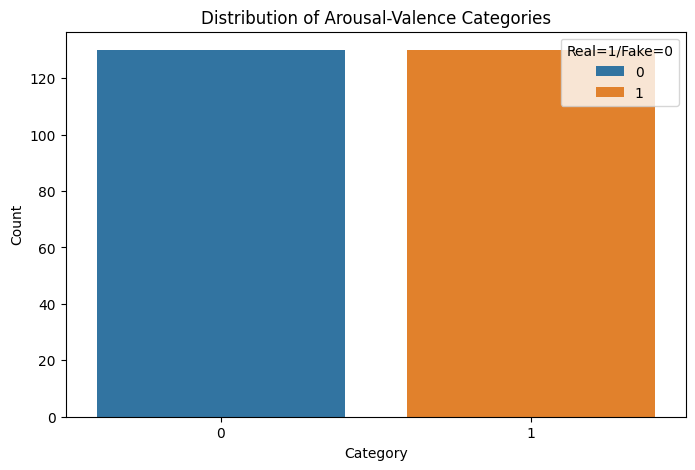

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the occurrences of each category

target_col = 'Real=1/Fake=0'
category_counts = df[target_col].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=category_counts.index, y=category_counts.values , hue= category_counts.index)

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Arousal-Valence Categories')

# Show the plot
plt.show()



The above plot shows that the both the columns have equal number of target categories (fake / real). There is no need for oversampling.